# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Christofel A Simbolon]
- **Email:** [christofelssimbolon@gmail.com]
- **ID Dicoding:** [christofel_simbolon]

#### Catatan 
1. Perbaiki Visualisasi jam aktivitas
2. Buat Clustering untuk jam tergantung rush hour dll,Clustering berdasarkan suhu dan kecepatan angin 


## Menentukan Pertanyaan Bisnis

- Bagaimana Jumlah dan Performa Penyewaan sepeda dalam rentang 2 tahun ?
- Pada Kondisi Cuaca(weatherit) yang bagaimana sepeda paling banyak disewa?
- Bagaimana Korelasi antara windspeed,kelembaban dan  temperature dengan jumlah penyewaan sepeda
- Pada Jam Berapa penyewaan sepeda paling banyak dan paling sedikit terjadi

## Import Semua Packages/Library yang Digunakan

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Data Wrangling

### Gathering Data

In [92]:
#Meload isi dari Tabel day.csv
day_df = pd.read_csv("D:\Belajar\Python\submission\data\day.csv")
day_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [93]:
#Meload isi dari Tabel hour.csv 
hour_df = pd.read_csv("D:\Belajar\Python\submission\data\hour.csv")
hour_df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**
Dua tabel yang telah dimuat memiliki kemiripan, namun perbedaannya terletak pada tabel *hour.csv*, yang memiliki lebih banyak kolom, yaitu 17, karena mencakup kolom *hr*. Selain itu, tabel ini juga memiliki lebih banyak baris karena menyimpan data per jam.

### Assessing Data

#### Menilai tabel `day_df`

In [94]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


**Penjelasan:** 
- Untuk Tabel day_info memiliki 16 kolom, dari 16 kolom hanya terdapat 1 kolom yang bertipe bukan numerik, jadi kedepannya kolom dteday ini akan diubah tipe datanya menjadi datetime.
- Untuk Kolom instant nantinya akan di drop karena tidak diperlukan.


In [95]:
#Melakukan Pengecekan missing value pada day_df
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Penjelasan:** Tidak terdapat Missing value pada day_df

In [96]:
#Melakukan Pengecekan Duplikasi pada day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())

Jumlah duplikasi:  0


**Penjelasan:** Tidak terdapat nilai duplikat/ganda pada day_df

In [97]:
#Menampilkan data statistik deskriptif dari day_df
day_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


#### Menilai tabel `hour_df`

In [98]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


**Penjelasan:** 
- Untuk Tabel hour_info memiliki kemiripan dengan day_info hanya berbeda pada jumlah kolom dan baris.Dari 17 kolom, dari 16 kolom hanya terdapat 1 kolom yang bertipe bukan numerik, jadi kedepannya kolom dteday ini akan diubah tipe datanya menjadi datetime.
- Untuk Kolom instant nantinya akan di drop karena tidak diperlukan.


In [99]:
#Melakukan Pengecekan missing value pada hour_df
hour_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

**Penjelasan:** Tidak terdapat Missing value pada hour_df

In [100]:
print("Jumlah Duplikat : ",hour_df.duplicated().sum())

Jumlah Duplikat :  0


**Penjelasan:** Tidak terdapat nilai duplikat/ganda pada day_df

In [101]:
#Menampilkan statistik deskriptif dari hour_df
hour_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

#### Langkah-Langkah Data Cleaning

1. **Melakukan Dropping**  
   - Menghapus kolom `instant` dari dataset karena tidak diperlukan.

2. **Melakukan Rename Kolom**  
   - Mengubah nama beberapa kolom agar lebih mudah dipahami:  
     - `dteday` → `date`  
     - `yr` → `year`  
     - `mnth` → `month`
     - `hr` → `hour`
     - `cnt` → `count`  

3. **Melakukan Mapping untuk Kolom `weathersit`**  
   - Mengubah nilai numerik menjadi kategori cuaca yang lebih jelas:  
     - `1` → **Cerah**  
     - `2` → **Berawan**  
     - `3` → **Hujan Ringan**  
     - `4` → **Hujan Lebat**  
4. **Melakukan Mapping untuk Kolom `year  `**  
   - Mengubah nilai :  
     - `0` → `2011`  
     - `1` → `2012`  

5. **Mengubah Tipe Data Kolom `dteday`**  
   - Mengonversi kolom `dteday` menjadi tipe data **datetime** untuk analisis waktu yang lebih akurat dan mempermudah analisis.


In [102]:
#Melakukan dropping
day_df.drop(['instant'],axis = 1,inplace = True)
hour_df.drop(['instant'],axis = 1, inplace=True)


In [103]:
#Melakukan Rename
day_df.rename(columns={
    'dteday': 'date',
    'yr':'year',
    'mnth':'month',
    'cnt': 'count'
},inplace=True)
hour_df.rename(columns={
    'dteday': 'date',
    'yr':'year',
    'mnth':'month',
    'hr':'hour',
    'cnt': 'count'
},inplace=True)


In [104]:
# Melakukan mapping untuk kolom weathersit
day_df['weathersit'] = hour_df['weathersit'].map({
    1:'Cerah',
    2:'Berawan',
    3:'Hujan Ringan',
    4:'Hujan Lebat'
})
hour_df['weathersit'] = hour_df['weathersit'].map({
    1:'Cerah',
    2:'Berawan',
    3:'Hujan Ringan',
    4:'Hujan Lebat'
})

In [105]:
# Melakukan mapping untuk kolom year
day_df['year'] = day_df['year'].map({
    0:2011,
    1:2012
})

hour_df['year'] = hour_df['year'].map({
    0:2011,
    1:2012
})

In [106]:
# Melakukan Konversi Tipe data Kolom date
day_df["date"] = pd.to_datetime(day_df["date"])
hour_df["date"] = pd.to_datetime(hour_df["date"])

**Insight:**
- Kolom instant sudah di drop
- Nama-nama kolom yang dibutuhkan sudah direname
- Kolom weathersit dan kolom year sudah di mapping
- Tipe data kolom date sudah di ubah 

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [107]:
#Melihat parameter statistik dari data hour_df
day_df.describe(include="all")


,date,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,420,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-01 00:00:00,2.496580,2011.500684,6.519836,0.028728,2.997264,0.683995,NaN,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,2011-07-02 12:00:00,2.000000,2011.000000,4.000000,0.000000,1.000000,0.000000,NaN,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,2012-01-01 00:00:00,3.000000,2012.000000,7.000000,0.000000,3.000000,1.000000,NaN,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,2012-07-01 12:00:00,3.000000,2012.000000,10.000000,0.000000,5.000000,1.000000,NaN,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,1.000000,6.000000,1.000000,NaN,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [108]:
# Menghitung Jumlah Penyewa untuk setiap tahun
yearly_stats = day_df.groupby("year")[["casual", "registered", "count"]].agg(["sum"])

# Menampilkan tabel hasil akhir
yearly_stats

,casual,registered,count
,sum,sum,sum
year,,,
2011,247252,995851,1243103
2012,372765,1676811,2049576


**Penjelasan:** Hasil diatas menunjukkan bahwa baik casual dan registered mengalami peningkatan dari tahun sebelumnya.


In [109]:
#Menghitung Jumlah Penyewa dalam setiap bulan
monthly_stats = day_df.groupby(["year", "month"])[["casual", "registered", "count"]].agg(["sum"])
monthly_stats

casual registered   count
              sum        sum     sum
year month                          
2011 1       3073      35116   38189
     2       6242      41973   48215
     3      12826      51219   64045
     4      22346      72524   94870
     5      31050     104771  135821
     6      30612     112900  143512
     7      36452     104889  141341
     8      28842     107849  136691
     9      26545     100873  127418
     10     25222      98289  123511
     11     15594      86573  102167
     12      8448      78875   87323
2012 1       8969      87775   96744
     2       8721      94416  103137
     3      31618     133257  164875
     4      38456     135768  174224
     5      44235     151630  195865
     6      43294     159536  202830
     7      41705     161902  203607
     8      43197     171306  214503
     9      43778     174795  218573
     10     34538     164303  198841
     11     21009     131655  152664
     12     13245     110468  123713

**Penjelasan:** Hasil diatas menunjukkan jika penyewaan tertinggi didapat di bulan 9 tahun 2012 disusul oleh bulan 8 tahun 2012 lalu kemudian cenderung turun.


In [110]:
day_df.groupby(by="weathersit")["count"].sum().sort_values(ascending=False).reset_index()


,weathersit,count
0,Cerah,1852753
1,Berawan,1125739
2,Hujan Ringan,306653
3,Hujan Lebat,7534


**Penjelasan:** Tabel diatas menunjukkan jumlah penyewa sepeda terbanyak ada dalam kondisi cuaca cerah


In [111]:
# Menghitung kuartil untuk windspeed, temp, dan hum
quartiles = {
    "windspeed": day_df["windspeed"].quantile([0.25, 0.50, 0.75]).values,
    "temp": day_df["temp"].quantile([0.25, 0.50, 0.75]).values,
    "hum": day_df["hum"].quantile([0.25, 0.50, 0.75]).values
}

# Fungsi untuk mengelompokkan nilai ke dalam 3 kuartil
def categorize_quartile(value, q1, q2, q3):
    if value <= q1:
        return "Low"
    elif value <= q2:
        return "Medium"
    elif value <= q3:
        return "High"

# Membuat kategori kuartil untuk setiap variabel
day_df["windspeed_q"] = day_df["windspeed"].apply(lambda x: categorize_quartile(x, *quartiles["windspeed"]))
day_df["temp_q"] = day_df["temp"].apply(lambda x: categorize_quartile(x, *quartiles["temp"]))
day_df["hum_q"] = day_df["hum"].apply(lambda x: categorize_quartile(x, *quartiles["hum"]))

# Menghitung total penyewaan berdasarkan kuartil untuk masing-masing variabel
windspeed_stats = day_df.groupby("windspeed_q")["count"].sum()
temp_stats = day_df.groupby("temp_q")["count"].sum()
hum_stats = day_df.groupby("hum_q")["count"].sum()

print("Total Penyewaan Berdasarkan Windspeed Quartile:\n", windspeed_stats)
print("\nTotal Penyewaan Berdasarkan Temperature Quartile:\n", temp_stats)
print("\nTotal Penyewaan Berdasarkan Humidity Quartile:\n", hum_stats)


Total Penyewaan Berdasarkan Windspeed Quartile:
 windspeed_q
High      752701
Low       905820
Medium    906176
Name: count, dtype: int64

Total Penyewaan Berdasarkan Temperature Quartile:
 temp_q
High      1017581
Low        478559
Medium     766142
Name: count, dtype: int64

Total Penyewaan Berdasarkan Humidity Quartile:
 hum_q
High      894270
Low       805517
Medium    883010
Name: count, dtype: int64


**Penjelasan:** Kita bisa membagi kolom windspeed,temp dan hum menjadi 3 kuartil yang dapat menunjukkan kira-kira di kuartil mana terjadi paling banyak peminjaman sepeda.


### Explore Data hour_df

In [112]:
hour_df.describe(include="all")

,date,season,year,month,hour,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,count
count,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Cerah,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11413,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2012-01-02 04:08:34.552045568,2.501640,2011.502561,6.537775,11.546752,0.028770,3.003683,0.682721,NaN,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,2011-01-01 00:00:00,1.000000,2011.000000,1.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-04 00:00:00,2.000000,2011.000000,4.000000,6.000000,0.000000,1.000000,0.000000,NaN,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,2012-01-02 00:00:00,3.000000,2012.000000,7.000000,12.000000,0.000000,3.000000,1.000000,NaN,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,2012-07-02 00:00:00,3.000000,2012.000000,10.000000,18.000000,0.000000,5.000000,1.000000,NaN,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,2012-12-31 00:00:00,4.000000,2012.000000,12.000000,23.000000,1.000000,6.000000,1.000000,NaN,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [113]:
# penyewaan berdasarkan jam
hour_df.groupby(by="hour").agg({
    "count": ["sum"]
})

,count
,sum
hour,
0,39130
1,24164
2,16352
3,8174
4,4428
5,14261
6,55132
7,154171


**Penjelasan:** Berdasarkan tabel diatas jam peminjaman sepeda tertinggi ada di jam 17 dan yang paling rendah ada di jam 4.


In [114]:
# Mendapatkan 5 jam dengan jumlah penyewaan terbanyak
top_5_hours = hour_df.groupby("hour")["count"].sum().nlargest(5)

# Mendapatkan 5 jam dengan jumlah penyewaan tersedikit
bottom_5_hours = hour_df.groupby("hour")["count"].sum().nsmallest(5)

# Menampilkan hasil
print("Top 5 Jam dengan Penyewaan Terbanyak:\n", top_5_hours)
print("\nBottom 5 Jam dengan Penyewaan Tersedikit:\n", bottom_5_hours)

Top 5 Jam dengan Penyewaan Terbanyak:
 hour
17    336860
18    309772
8     261001
16    227748
19    226789
Name: count, dtype: int64

Bottom 5 Jam dengan Penyewaan Tersedikit:
 hour
4     4428
3     8174
5    14261
2    16352
1    24164
Name: count, dtype: int64


**Penjelasan:** Jika dilihat lebih rinci Jam peminjaman sepeda paling banyak ada di jam 17,18,8,16 dan 19.
Dan Peminjaman tersedikit ada di jam 4,3,5,2,1.



## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana Tren Penyewaan sepeda dalam rentang 2 tahun ?

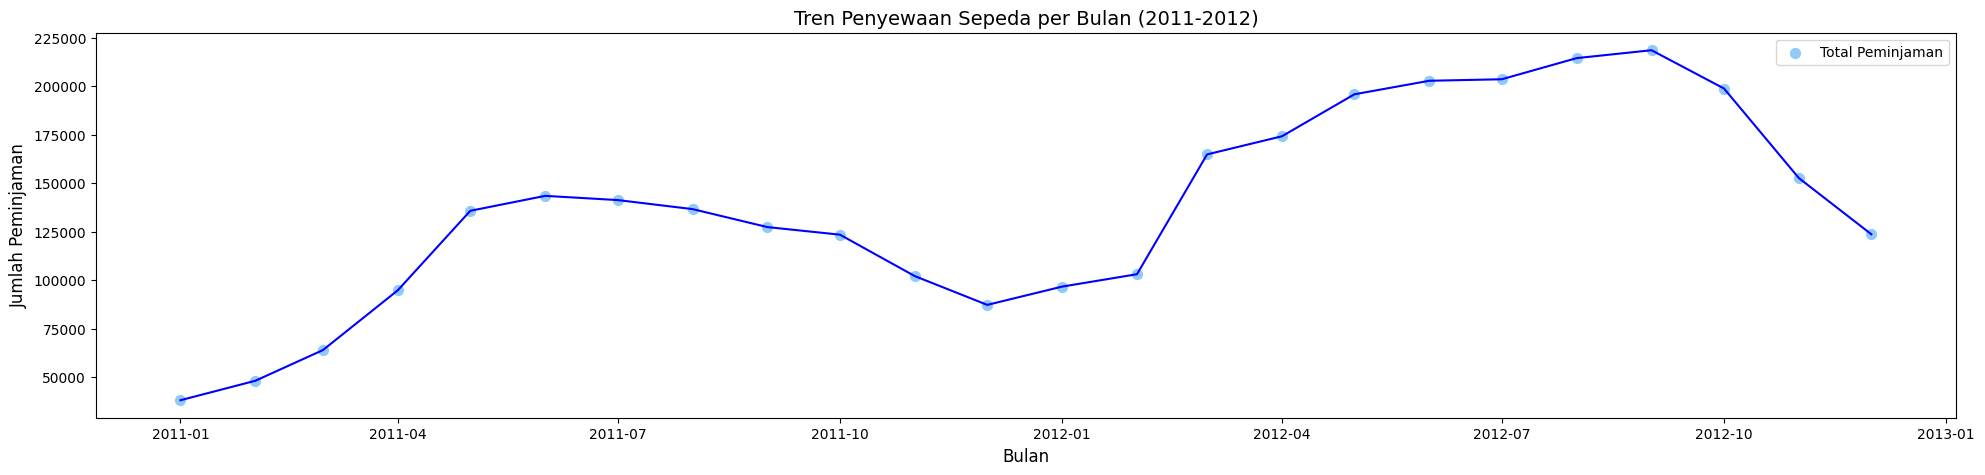

Total penyewaan sepeda selama 2 tahun: 3292679
Rata-rata penyewaan sepeda per bulan: 137194.95833333334


In [115]:

# Mengelompokkan data berdasarkan bulan dan menghitung **total pelanggan per bulan**
monthly_counts = day_df.groupby(day_df["date"].dt.to_period("M"))["count"].sum()

# Konversi indeks ke datetime untuk plotting
monthly_counts.index = monthly_counts.index.astype(str)
monthly_counts.index = pd.to_datetime(monthly_counts.index)

# Mengatur ukuran figure
plt.figure(figsize=(24, 5))

# Membuat scatter plot jumlah pelanggan per bulan
plt.scatter(monthly_counts.index, monthly_counts.values, c="#90CAF9", s=50, marker='o', label="Total Peminjaman")

# Membuat line plot jumlah pelanggan per bulan
plt.plot(monthly_counts.index, monthly_counts.values, linestyle="-", color="b")

# Penamaan untuk sumbu x dan y
plt.xlabel("Bulan", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)

# Menambahkan judul
plt.title("Tren Penyewaan Sepeda per Bulan (2011-2012)", fontsize=14)

# Menampilkan legenda
plt.legend()

# Menampilkan plot
plt.show()

# Menampilkan jumlah total penyewaan dalam 2 tahun
print("Total penyewaan sepeda selama 2 tahun:", monthly_counts.sum())

# Menampilkan rata-rata penyewaan per bulan
print("Rata-rata penyewaan sepeda per bulan:", monthly_counts.mean())


**Penjelasan:** 

Line Chart diatas menunjukkan bagaimana tren penyewaan sepeda per bulan dalam 2 tahun dalam rentang 2011-2012.

Kita bisa melihat ada peningkatan dari awal tahun 2011 sampai bulan 6 tahun 2011 lalu terjadi penurunan dan kembali lagi naik secara signifikan lagi bulan mulai bulan 2 tahun 2012. 


Memberikan Informasi jumlah penyewaan selama 2 tahun adalah : 3292679 serta rata-rata penyewaannya sepeda perbulannya adalah :137194.9

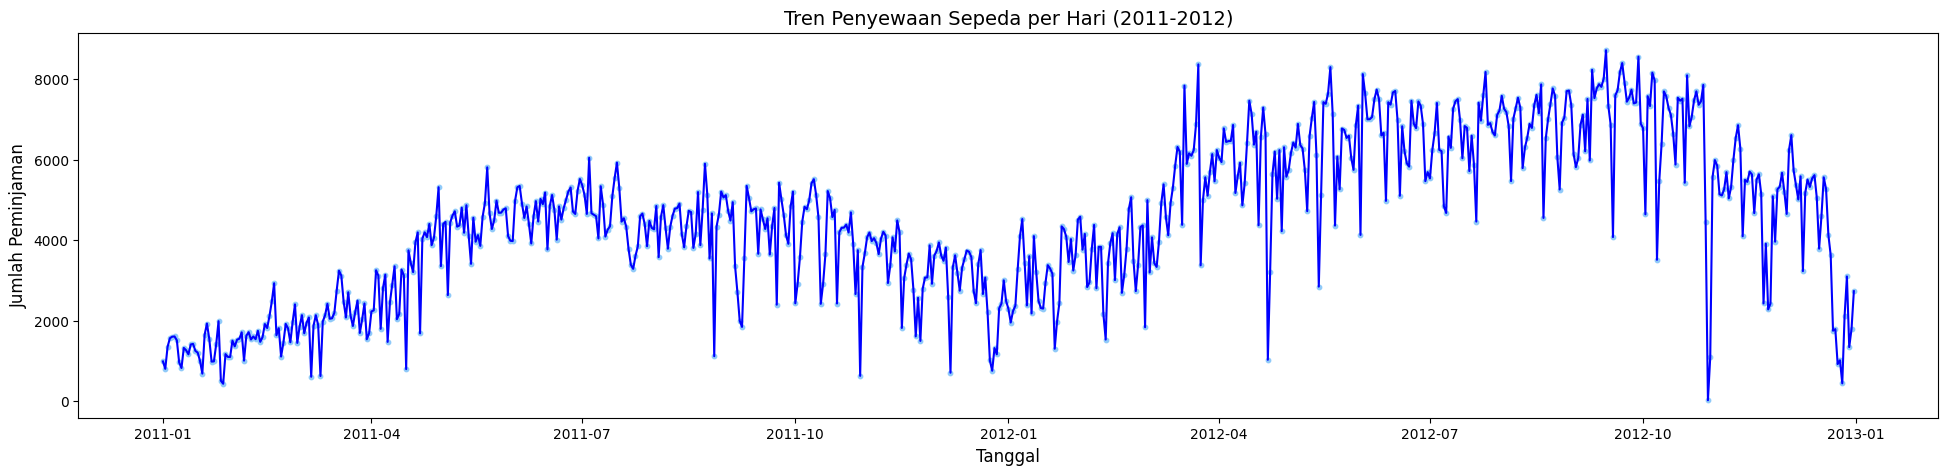

Total penyewaan sepeda selama 2 tahun: 3292679
Rata-rata penyewaan sepeda per hari: 4504.3488372093025


In [116]:
# Mengatur ukuran figure
plt.figure(figsize=(24, 5))

# Mengelompokkan data berdasarkan hari dan menghitung jumlah peminjaman per hari
daily_counts = day_df.groupby(day_df["date"])["count"].sum()

# Membuat scatter plot jumlah pelanggan per hari
plt.scatter(daily_counts.index, daily_counts.values, c="#90CAF9", s=10, marker='o')

# Membuat line plot jumlah pelanggan per hari
plt.plot(daily_counts.index, daily_counts.values, linestyle="-", color="b")

# Penamaan untuk sumbu x dan y
plt.xlabel("Tanggal", fontsize=12)
plt.ylabel("Jumlah Peminjaman", fontsize=12)

# Menambahkan judul
plt.title("Tren Penyewaan Sepeda per Hari (2011-2012)", fontsize=14)

# Menampilkan plot
plt.show()

# Menampilkan jumlah total penyewaan dalam 2 tahun
print("Total penyewaan sepeda selama 2 tahun:", daily_counts.sum())

# Menampilkan rata-rata penyewaan per hari
print("Rata-rata penyewaan sepeda per hari:", daily_counts.mean())


**Penjelasan:** Line Chart diatas menunjukkan bagaimana tren penyewaan sepeda per hari dalam 2 tahun dalam rentang 2011-2012.

Penyewaan sepeda dicatat perhari sehingga menunjukkan fluaktuasi yang besar setiap harinya.


dan memberikan jumlah penyewaan selama 2 tahun adalah : 3292679 serta rata-rata penyewaannya sepeda per hari adalah :4504.3

### Pertanyaan 2: Pada Kondisi Cuaca(weatherit) yang bagaimana sepeda paling banyak disewa?

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20552\2408006074.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="weathersit", y="count", data=weather_counts, palette=palette_colors)


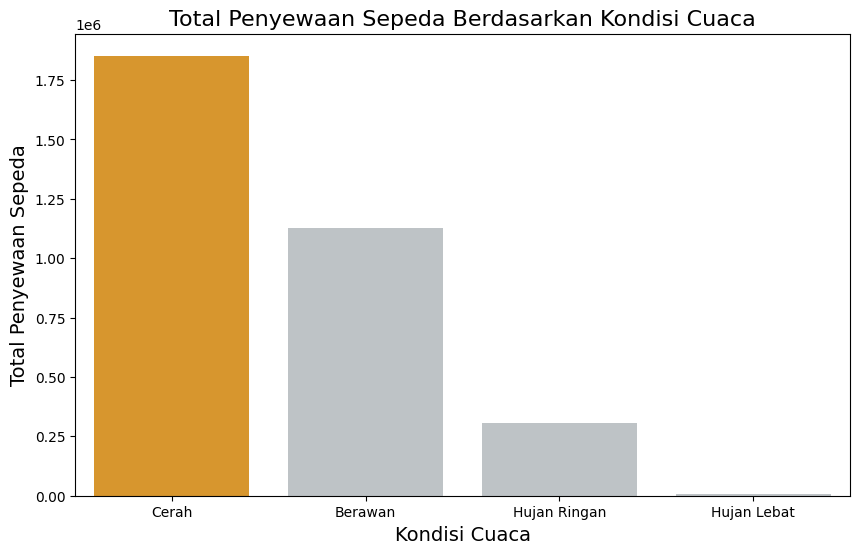

In [117]:
# Menghitung total penyewaan berdasarkan kondisi cuaca
weather_counts = day_df.groupby("weathersit")["count"].sum().sort_values(ascending=False).reset_index()

# Menentukan warna:
palette_colors = ["#F39C12", "#BDC3C7", "#BDC3C7", "#BDC3C7"]  

# Membuat bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x="weathersit", y="count", data=weather_counts, palette=palette_colors)

# Mengatur label dan judul
plt.xlabel("Kondisi Cuaca", fontsize=14)
plt.ylabel("Total Penyewaan Sepeda", fontsize=14)
plt.title("Total Penyewaan Sepeda Berdasarkan Kondisi Cuaca", fontsize=16)

# Menampilkan plot
plt.show()


**Penjelasan:** Bar chart di atas menunjukkan bahwa jumlah penyewaan sepeda tertinggi terjadi saat cuaca cerah, yaitu sebanyak (1.852.753 kali). Penyewaan terbanyak berikutnya terjadi saat cuaca berawan (1.125.739 kali), diikuti oleh hujan ringan (306.653 kali) dan hujan lebat (7.534 kali).

### Pertanyaan 3: Bagaimana Korelasi antara windspeed,kelembaban dan  temperature dengan jumlah penyewaan sepeda

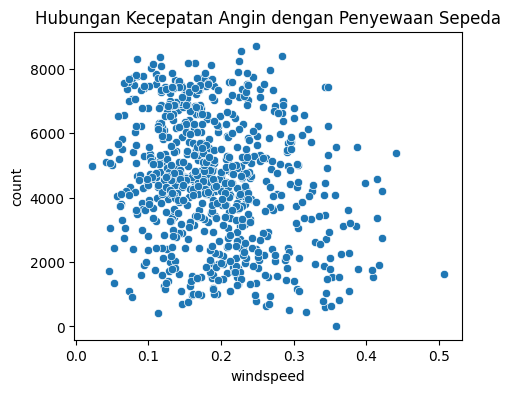

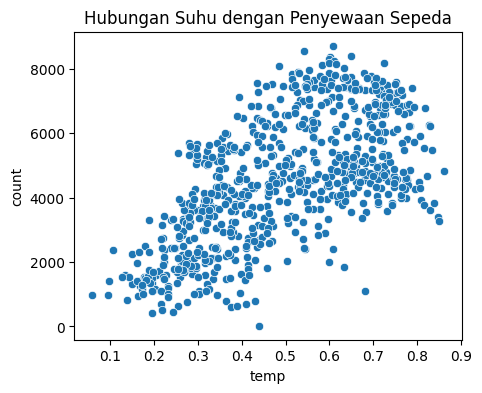

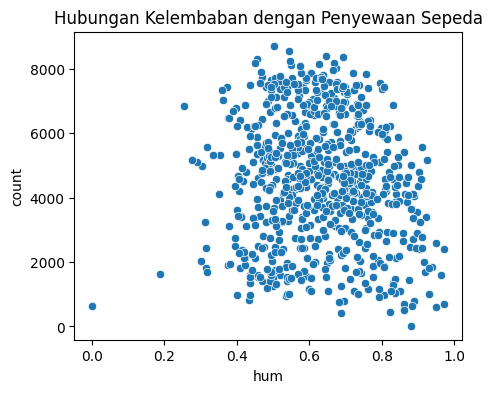

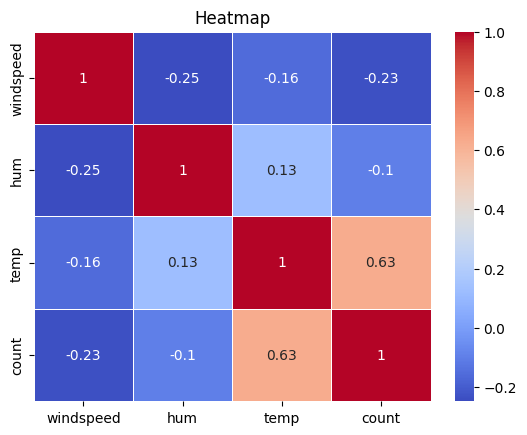

In [118]:
correlation_matrix = day_df[["windspeed", "hum", "temp", "count"]].corr()
# Scatter plot antara suhu & jumlah penyewaan
plt.figure(figsize=(5,4))
sns.scatterplot(data=day_df, x="windspeed", y="count")
plt.title("Hubungan Kecepatan Angin dengan Penyewaan Sepeda")
plt.show()

# Scatter plot antara suhu & jumlah penyewaan
plt.figure(figsize=(5,4))
sns.scatterplot(data=day_df, x="temp", y="count")
plt.title("Hubungan Suhu dengan Penyewaan Sepeda")
plt.show()

# Scatter plot antara kelembaban & jumlah penyewaan
plt.figure(figsize=(5,4))
sns.scatterplot(data=day_df, x="hum", y="count")
plt.title("Hubungan Kelembaban dengan Penyewaan Sepeda")
plt.show()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap")
plt.show()

**Penjelasan:** Berdasarkan Visualisasi Scatter plot dan heap map diatas kita bisa mengambil kesimpulan:

1. Untuk Windspeed dengan Jumlah Penyewa pada scatter plot tidak ditemukan pola yang jelas dan dipertegas lewat heatmap bahwa windspeed berkorelasi negatif lemah dengan jumlah penyewa dengan nilai(-0.23).Yang berarti Semakin tinggi kecepatan angin, kemungkinan penyewaan sepeda sedikit berkurang

2. Untuk Temp dengan Jumlah Penyewa pada scatter plot menunjukkan ada pola linear positif dan diperjelas dengan heatmap bahwa temp berkorelasi positif sedang dengan jumlah penyewa dengan nilai(0.63)

3. Untuk  dengan Jumlah Penyewa pada scatter plot tidak ditemukan pola yang jelas dan dipertegas lewat heatmap bahwa windspeed berkorelasi negatif lemah dengan jumlah penyewa dengan nilai(-0.10).

### Pertanyaan 4:Pada Jam Berapa penyewaan sepeda paling banyak dan paling sedikit terjadi

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20552\1684142384.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count", data=top_5_hours, palette=top_colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20552\1684142384.py:15: UserWarning: 
The palette list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="hour", y="count", data=top_5_hours, palette=top_colors, ax=ax[0])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_20552\1684142384.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="hour", y="count", data=bottom_5_hours, palette=bottom_colors, ax=ax[1])
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_

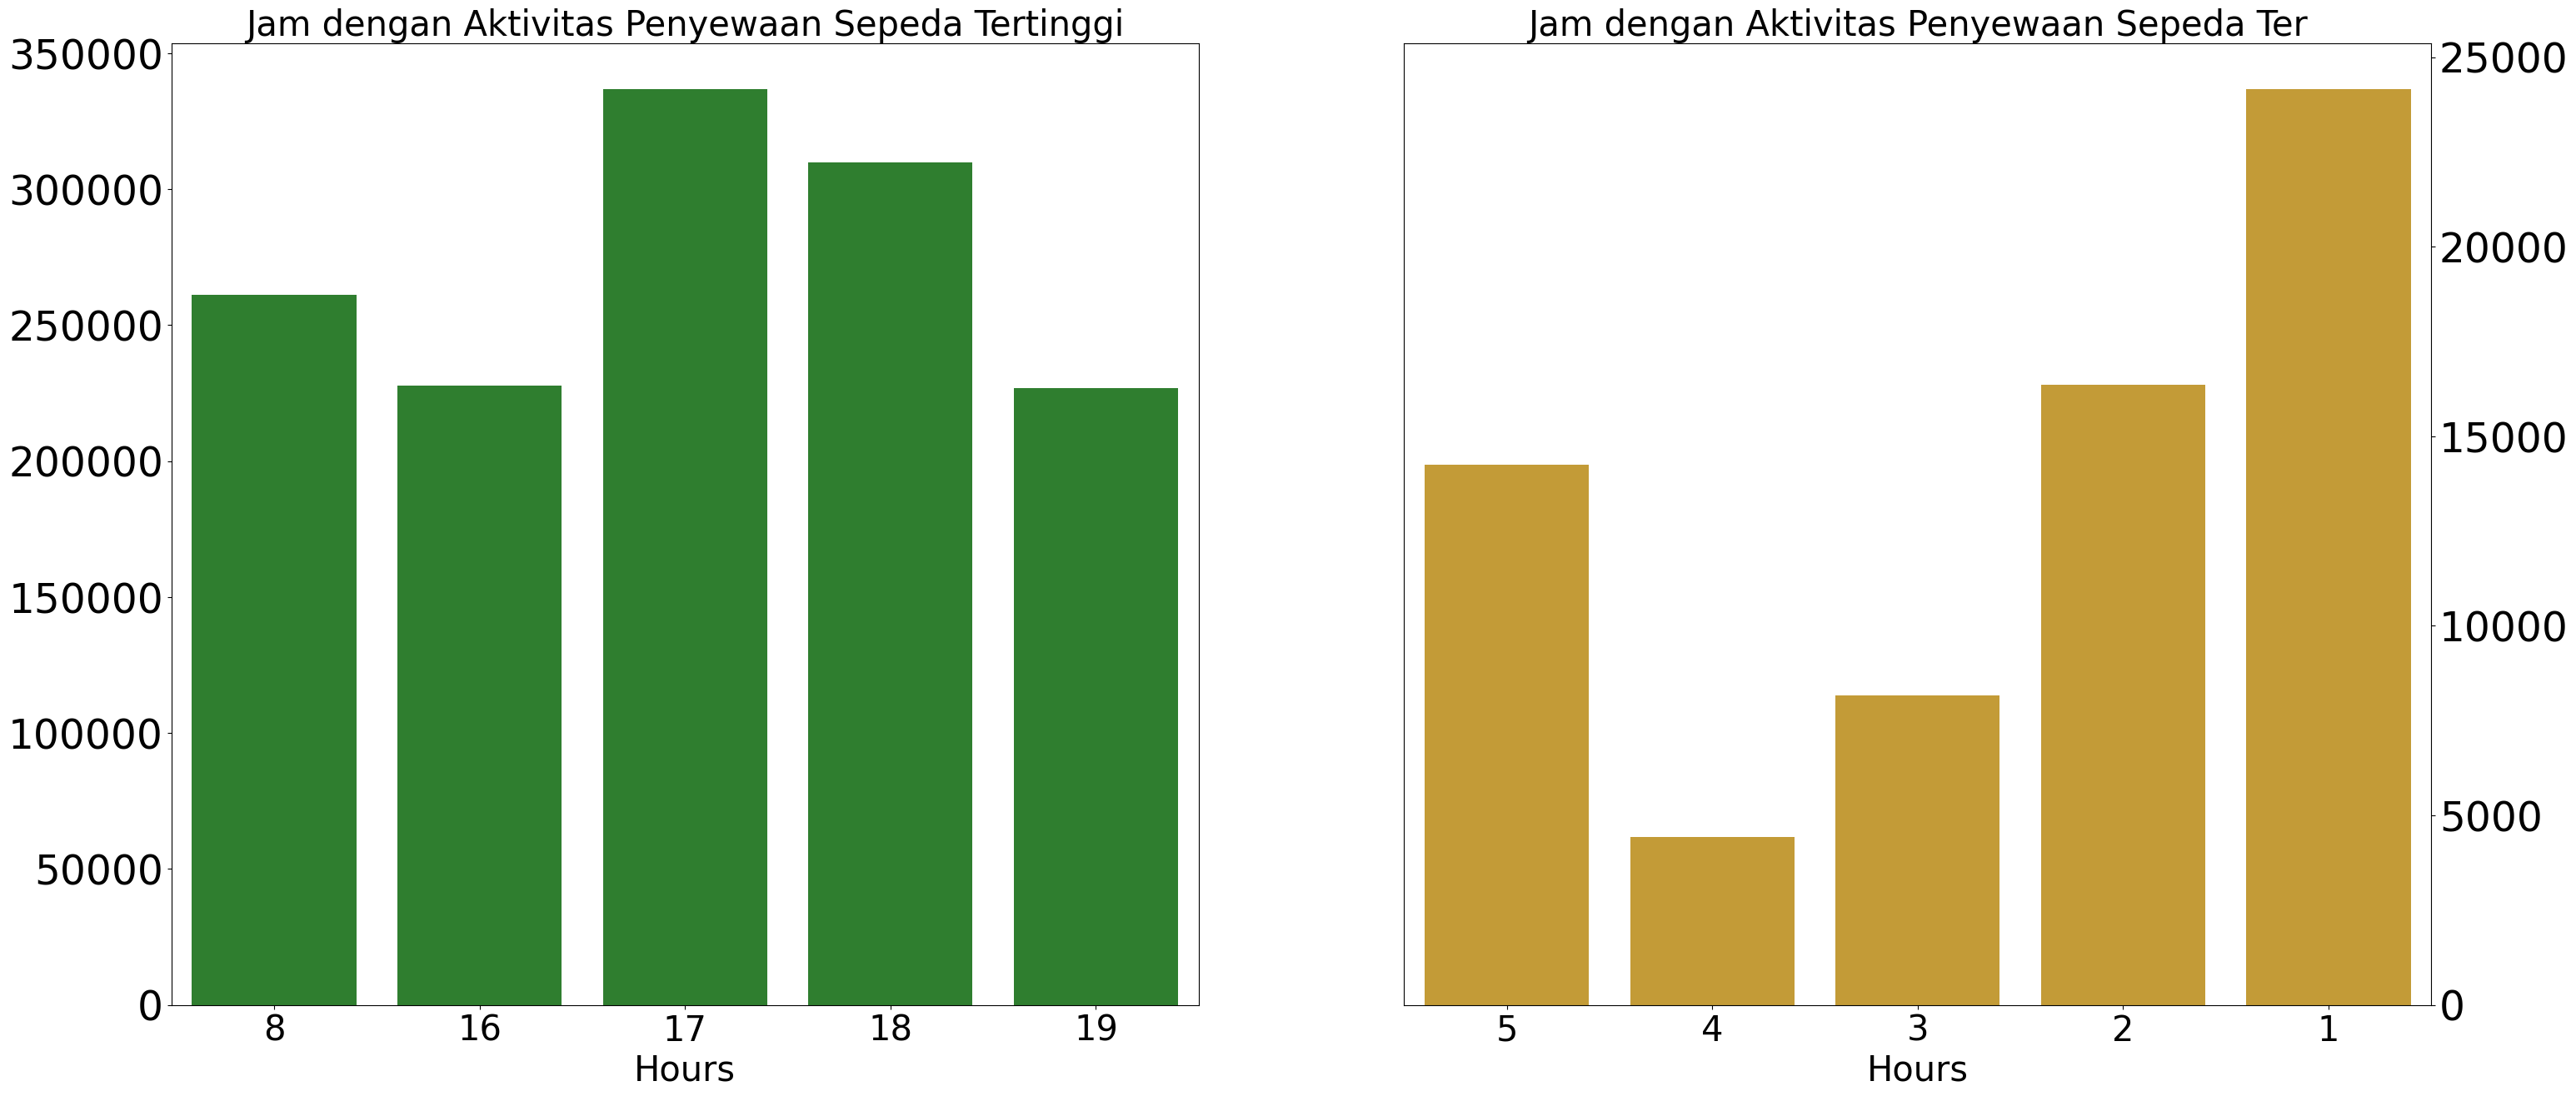

In [119]:
# Menghitung total penyewaan per jam
hourly_counts = hour_df.groupby("hour")["count"].sum()

# Mendapatkan 5 jam dengan penyewaan terbanyak dan tersedikit
top_5_hours = hourly_counts.nlargest(5).reset_index()
bottom_5_hours = hourly_counts.nsmallest(5).reset_index()

# Membuat subplots
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(35, 15))
top_colors =["#228B22"]
bottom_colors = ["#DAA520"]


# Barplot untuk penyewaan terbanyak
sns.barplot(x="hour", y="count", data=top_5_hours, palette=top_colors, ax=ax[0])

# Mengatur label dan judul 
ax[0].set_ylabel(None)
ax[0].set_xlabel("Hours", fontsize=30)
ax[0].set_title("Jam dengan Aktivitas Penyewaan Sepeda Tertinggi", loc="center", fontsize=30)
ax[0].tick_params(axis='y', labelsize=35)
ax[0].tick_params(axis='x', labelsize=30)

sns.barplot(x="hour", y="count", data=bottom_5_hours, palette=bottom_colors, ax=ax[1])


ax[1].set_ylabel(None)
ax[1].set_xlabel("Hours", fontsize=30)
ax[1].set_title("Jam dengan Aktivitas Penyewaan Sepeda Ter", loc="center", fontsize=30)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()
ax[1].tick_params(axis='y', labelsize=35)
ax[1].tick_params(axis='x', labelsize=30)

# Menampilkan plot
plt.show()


**Penjelasan:** Berdasarkan bar chart yang ditampilkan:  

- Jam dengan penyewaan sepeda terbanyak terjadi pada **jam 17**, dengan jumlah penyewaan mencapai angka tertinggi di grafik. Selain itu, jam lain dengan aktivitas penyewaan yang tinggi adalah **jam 18, 8, 16, dan 19**. 
- Jam dengan penyewaan sepeda paling sedikit terjadi pada **jam 4**, yang memiliki jumlah penyewaan terendah di grafik. Selain itu, jam lain dengan aktivitas penyewaan rendah adalah **jam 3, 2, 5, dan 1**.


## Analisis Lanjutan

### Melanjutkan Pertanyaan 3 & 4 kita akan melakukan Clustering(Manual Grouping) untuk:
- Clustering Berdasarkan Kategori waktu untuk jumlah penyewaan :
     - `Jam 20:00 - 06:00` → `Jam Sepi`  
     - `Jam 10:00 - 16.00 ` → `Jam Biasa`
     - `Jam 07:00 - 09.00 & 17.00 -19.00` → `Jam Sibuk/Jam Padat`

- Clustering Berdasarkan Kombinasi temp(suhu) dan windspeed(kecepatan angin) untuk jumlah penyewaan:
     - `Suhu dibagi 3 kuartil` → `q1 <= suhu rendah` → `q1 <= suhu sedang <= q3` → `q3 => tinggi`
     - `Kecepatan Angin dibagi 3 kuartil` → `q1 <= suhu rendah` → `q1 <= suhu sedang <= q3` → `q3 => tinggi`
 


In [120]:
# Melakukan Clustering Berdasarkan Waktu 
def categorize_time(hour):
    if 7 <= hour <= 9 or 17 <= hour <= 19:
        return "Jam Sibuk"
    elif 10 <= hour <= 16:
        return "Jam Normal"
    else:
        return "Jam Sepi"

# Menambahkan kolom kategori waktu ke dalam dataset
hour_df["time_category"] = hour_df["hour"].apply(categorize_time)

# Menghitung distribusi tiap kategori waktu
time_category_counts = hour_df.groupby("time_category")["count"].sum().sort_values(ascending=False)
time_category_counts.to_frame()


,count
time_category,
Jam Sibuk,1448031
Jam Normal,1233459
Jam Sepi,611189


**Penjelasan:** Berdasarkan Dataframe diatas didapat data bahwa:

Jam Sibuk  = 1448031

Jam Normal = 1233459

Jam Sepi  = 611189

Hal ini sesuai dengan visualisasi pada nomor 4 diatas bahwa **Jam dengan Aktivitas Penyewaan Sepeda Tertinggi** yang kebanyakan masuk dalam kategori **Jam Sibuk** dan **Jam dengan Aktivitas Penyewaan Sepeda Terendah** yang kebanyakan masuk dalam **Jam Sepi**

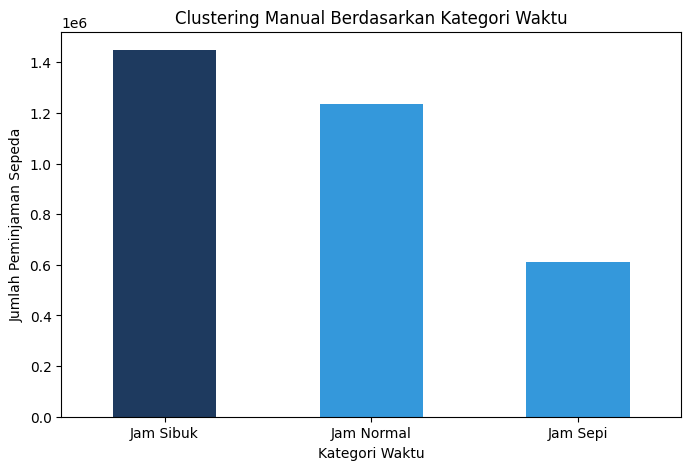

time_category
Jam Sibuk     1448031
Jam Normal    1233459
Jam Sepi       611189
Name: count, dtype: int64

In [ ]:
# Membuat visualisasi hasil grouping manual berdasarkan waktu terhadap jumalh penyewaan
# Base color (gelap) & highlight color (terang untuk nilai tertinggi)
base_color = "#1E3A5F"
highlight_color = "#3498DB"

# Menentukan kategori dengan jumlah tertinggi
max_category = time_category_counts.idxmax()  

# Menentukan warna untuk setiap kategori
colors = [base_color if cat == max_category else highlight_color for cat in time_category_counts.index]

plt.figure(figsize=(8, 5))
time_category_counts.plot(kind="bar", color=colors)

plt.title("Clustering Berdasarkan Kategori Waktu")
plt.xlabel("Kategori Waktu")
plt.ylabel("Jumlah Peminjaman Sepeda")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="", alpha=0.7)

plt.show()

# Menampilkan jumlah data per kategori
time_category_counts

**Penjelasan:** Visualisasi Diatas menunjukkan pengelompokkan data berdasarkan kategori waktu yang sudah dijelaskan di atas.


In [122]:
#  Clustering Berdasarkan Kombinasi temp(suhu) dan windspeed(kecepatan angin):
temp_q1, temp_q2, temp_q3 = hour_df["temp"].quantile([0.25, 0.5, 0.75])
wind_q1, wind_q2, wind_q3 = hour_df["windspeed"].quantile([0.25, 0.5, 0.75])

# Fungsi untuk mengelompokkan suhu berdasarkan kuartil
def categorize_temp_q(temp):
    if temp <= temp_q1:
        return "Suhu Rendah"
    elif temp_q1 < temp <= temp_q3:
        return "Suhu Sedang"
    else:
        return "Suhu Tinggi"

# Fungsi untuk mengelompokkan kecepatan angin berdasarkan kuartil
def categorize_windspeed_q(windspeed):
    if windspeed <= wind_q1:
        return "Angin Rendah"
    elif wind_q1 < windspeed <= wind_q3:
        return "Angin Sedang"
    else:
        return "Angin Tinggi"

# Menambahkan kategori ke dataset berdasarkan kuartil
hour_df["temp_quartile_category"] = hour_df["temp"].apply(categorize_temp_q)
hour_df["wind_quartile_category"] = hour_df["windspeed"].apply(categorize_windspeed_q)

# Membuat kombinasi clustering suhu & kecepatan angin berdasarkan kuartil
hour_df["temp_wind_quartile_cluster"] = hour_df["temp_quartile_category"] + " & " + hour_df["wind_quartile_category"]

# Menghitung jumlah data dalam setiap cluster
temp_wind_quartile_counts = hour_df.groupby("temp_wind_quartile_cluster")["count"].sum().sort_values(ascending= False)
temp_wind_quartile_counts.to_frame()


,count
temp_wind_quartile_cluster,
Suhu Sedang & Angin Sedang,793688
Suhu Tinggi & Angin Sedang,573915
Suhu Sedang & Angin Tinggi,465677
Suhu Sedang & Angin Rendah,459239
Suhu Tinggi & Angin Tinggi,292655
Suhu Tinggi & Angin Rendah,241710
Suhu Rendah & Angin Sedang,201783
Suhu Rendah & Angin Tinggi,132133
Suhu Rendah & Angin Rendah,131879


**Penjelasan:** : Dataframe diatas didapat lewat membagi kolom suhu dan windspeed kedalam 3 kuartil dan dikelompokkan berdasarkan jumlah penyewaan(count) sehingga didapat hasil diatas bahwasanya pengelompokkan terbesar di dapat lewat Suhu Sedang & Angin Sedang dan yang kelompok paling rendah dimiliki oleh Suhu Rendah & Angin Rendah


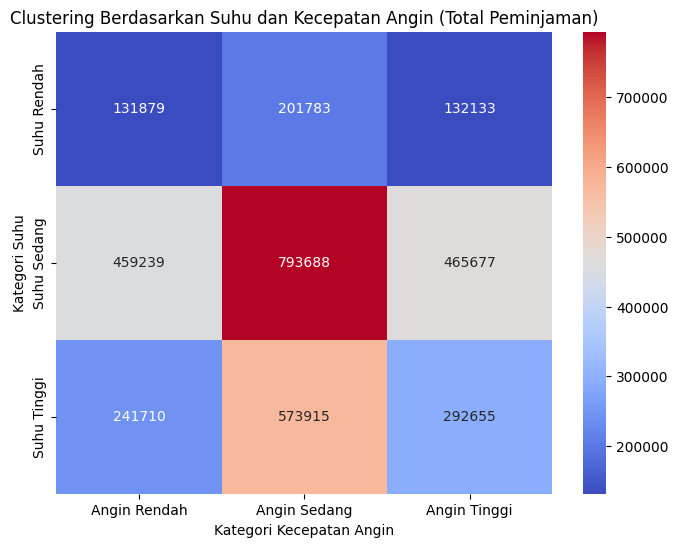

In [ ]:
# Membuat pivot table untuk heatmap Terhadap jumlah peminjaman sepeda
heatmap_data = hour_df.pivot_table(values="count",  
                                   index="temp_quartile_category",  
                                   columns="wind_quartile_category",  
                                   aggfunc="sum")

# Visualisasi heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap="coolwarm")

# Menambahkan judul dan label
plt.title("Clustering Berdasarkan Suhu dan Kecepatan Angin (Total Peminjaman)")
plt.xlabel("Kategori Kecepatan Angin")
plt.ylabel("Kategori Suhu")

plt.show()

**Penjelasan:** Berikut adalah visualisasi menggunakan heatmap untuk dataframe diatas.


## Conclusion

Conclution pertanyaan 1 :
- Tren cenderung menaik dari tahun sebelumnya
- Walaupun ada fluaktuasi dari beberapa rentang waktu
- Total Penyewaan yang terjadi ada sebanyak 3.292.679 dengan rata-rata dalam bulan = 137194,95 dan dalam hari = 4504.3

Conclution pertanyaan 2 :
- Penyewaan Terbanyak terjadi saat cuaca cerah sebanyak = 1.852.753 kali
- Diikuti Berawan  sebanyak = 1.125.739 kali, Hujan Ringan = 306.653 kali dan hujan lebat (7.534 kali)

Conclution pertanyaan 3 : 
- Korelasi Sedang Positif terjadi untuk temp dengan count
- Korelasi Negatif lemah terjadi untuk windspeed dengan count dan hum dengan count

Conclution Pertanyaan 4 :
- Jam dengan penyewaan tertinggi terjadi pada jam 17 diikuti jam 18,8,16 dan 19
- Jam dengan penyewaan terendah terjadi pada jam 4 diikuti jam 3,2,5 dan 1

Conclution Untuk Analisis Lanjutan:
- Untuk Clustering berdasarkan kategori waktu yang jumlah anggota terbesar adalah cluster **jam sibuk** dan jumlah anggota tersedikit adalah cluster **jam sepi**
- Untuk Clustering Kombinasi suhu dan kecepatan angin jumlah anggota terbesar adalah cluster **angin sedang & suhu sedang** dan jumlah anggota cluster tersedikit adalah **angin rendah dan suhu rendah**



In [124]:
hour_df.to_csv("hour_data_cleaned.csv",index =False)
day_df.to_csv("day_data_cleaned.csv",index=False)